In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
import torch
#from torch import nn
#import mnist
#import os

from teleport import *
from objectives import *
from optim import *
from params import *
from train import *

## Ellipsoid

In [2]:
obj = ellipsoid
opts = ["cmaes", "gd", "gd"]
epochs = 100
x_init = torch.tensor([2.0,0.0],requires_grad=True)
labels = ["cmaes", "gd", "gd w/ tel"]
changes = [[["cmaes","s",0.5]],[["gd","lr",0.02]],[["gd","lr",0.02]]]
ts = [[],[],[1]]
mrs = [100,1,10]

elli = run(obj, opts, epochs, x_init, labels, changes, ts, multiruns=mrs, verbose=0)

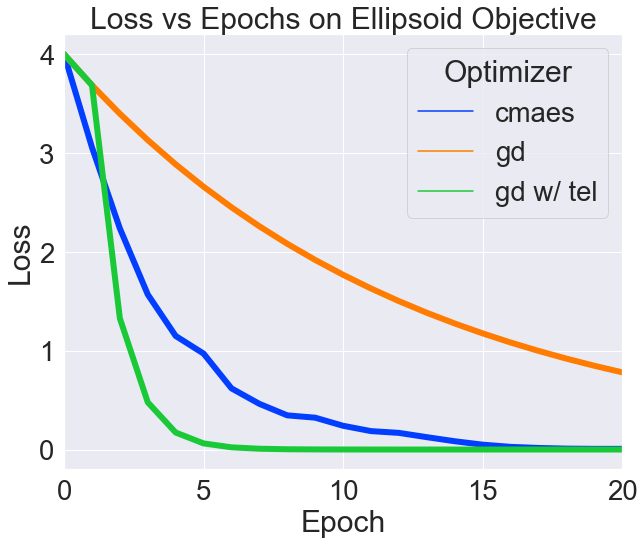

In [3]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=elli, x="epoch", y="loss", hue="label", linewidth=6)

fig.set_title("Loss vs Epochs on Ellipsoid Objective")
fig.set(xlabel="Epoch", ylabel="Loss")
fig.set(xlim=(0, 20))
fig.legend(title="Optimizer")

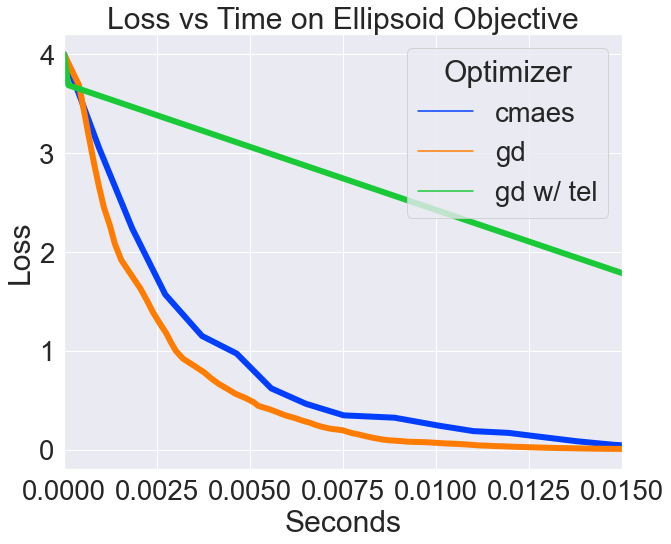

In [4]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=elli, x="time", y="loss", hue="label", linewidth=6)

fig.set_title("Loss vs Time on Ellipsoid Objective")
fig.set(xlabel="Seconds", ylabel="Loss")
fig.set(xlim=(0, 0.015))
fig.legend(title="Optimizer")

## Booth

In [5]:
obj = booth
opts = ["cmaes", "gd", "gd"]
epochs = 100
x_init = torch.tensor([5.0,-5.0],requires_grad=True)
labels = ["cmaes", "gd", "gd w/ tel @ epoch 2"]
changes = [[["cmaes","s",0.5]],[["gd","lr",0.01]],[["gd","lr",0.01]]]
ts = [[],[],[2]]
mrs = [50,1,10]

bth = run(obj, opts, epochs, x_init, labels, changes, ts, multiruns=mrs, verbose=0)

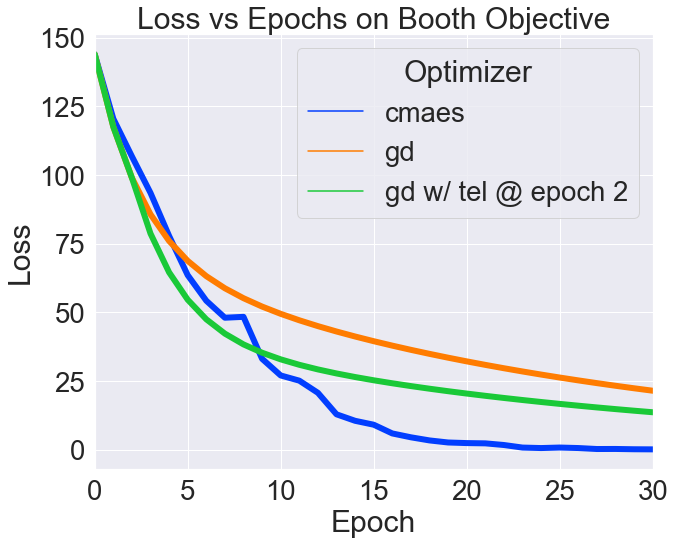

In [6]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=bth, x="epoch", y="loss", hue="label", linewidth=6)

fig.set_title("Loss vs Epochs on Booth Objective")
fig.set(xlabel="Epoch", ylabel="Loss")
fig.set(xlim=(0, 30))
fig.legend(title="Optimizer")

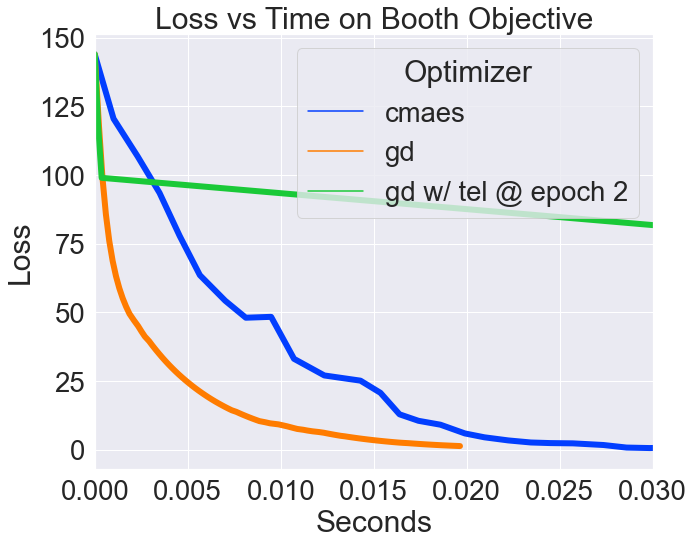

In [8]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=bth, x="time", y="loss", hue="label", linewidth=6)

fig.set_title("Loss vs Time on Booth Objective")
fig.set(xlabel="Seconds", ylabel="Loss")
fig.set(xlim=(0, 0.03))
fig.legend(title="Optimizer")

## Rosenbrock

In [85]:
obj = rosenbrock
opts = ["cmaes", "gd", "gd","adam"]
epochs = 400
x_init = torch.tensor([-1.0,-1.0],requires_grad=True)
labels = ["cmaes", "gd", "gd w/ tel @ epochs 120,180,240","adam"]
changes = [[["cmaes","s",0.5]],[["gd","lr",0.001]],[["gd","lr",0.001]],[["adam","lr",0.2]]]
ts = [[],[],[120,180,240],[]]
mrs = [100,1,1,1]

ros = run(obj, opts, epochs, x_init, labels, changes, ts, multiruns=mrs, verbose=0)

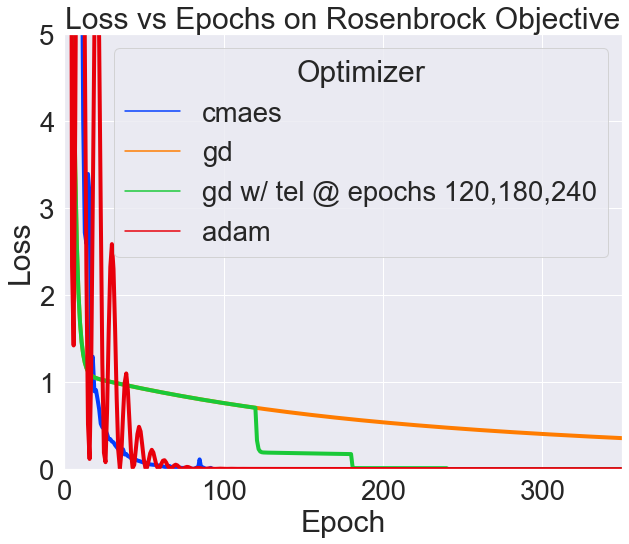

In [89]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=ros, x="epoch", y="loss", hue="label", linewidth=4)

fig.set_title("Loss vs Epochs on Rosenbrock Objective")
fig.set(xlabel="Epoch", ylabel="Loss")
fig.set(ylim=(0, 5))
fig.set(xlim=(0, 350))
fig.legend(title="Optimizer")

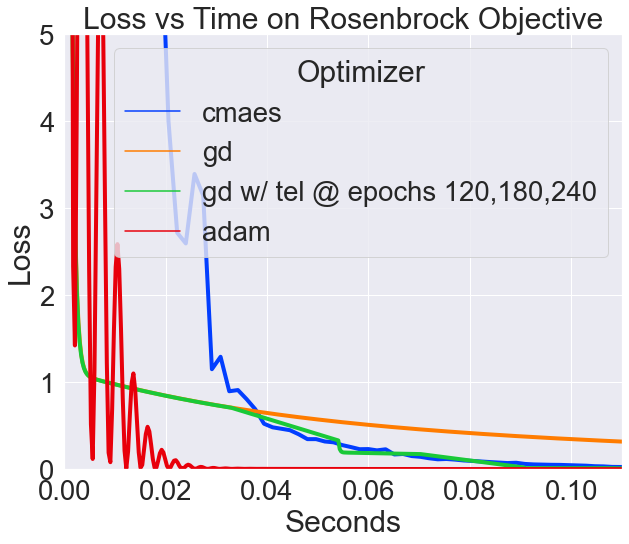

In [90]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=ros, x="time", y="loss", hue="label", linewidth=4)

fig.set_title("Loss vs Time on Rosenbrock Objective")
fig.set(xlabel="Seconds", ylabel="Loss")
fig.set(xlim=(0, 0.11))
fig.set(ylim=(0, 5))
fig.legend(title="Optimizer")

## Pitfalls

In [9]:
def plot_level_sets_ros():
    L = np.array([1e0, 1e1, 1e2, 1e3, 1e4] )
    t = np.linspace(0, 2*np.pi, 1000)
    for loss in L:
        u = np.sqrt(loss) * np.cos(t)
        v = np.sqrt(loss) * np.sin(t)
        vec = ros_v_to_x(torch.tensor([u,v]))
        x = vec[0]
        y = vec[1]
        plt.plot(x, y, color='gray')
    plt.xlim(-5.0, 5.0)
    plt.ylim(-0.5, 20.0)

In [10]:
def plot_level_sets_bth():
    L = np.array([1e0, np.sqrt(10)*1e0, 1e1, np.sqrt(10)*1e1, 1e2, np.sqrt(10)*1e2, 1e3, np.sqrt(10)*1e3, 1e4] )
    t = np.linspace(0, 2*np.pi, 1000)
    for loss in L:
        u = np.sqrt(loss) * np.cos(t)
        v = np.sqrt(loss) * np.sin(t)
        vec = booth_v_to_x(torch.tensor([u,v]))
        x = vec[0]
        y = vec[1]
        plt.plot(x, y, color='gray')
    plt.xlim(-10.0, 10.0)
    plt.ylim(-10.0, 10.0)

In [11]:
obj = rosenbrock
opts = ["gd", "gd"]
epochs = 25
x_init = torch.tensor([3.0,6.0],requires_grad=True)
labels = ["gd", "gd w/ tel"]
changes = [[["gd","lr",0.0001]],[["gd","lr",0.0001]]]
ts = [[],[2,10,20]]
mrs = [1,1]

ros2 = run(obj, opts, epochs, x_init, labels, changes, ts, multiruns=mrs, verbose=0)

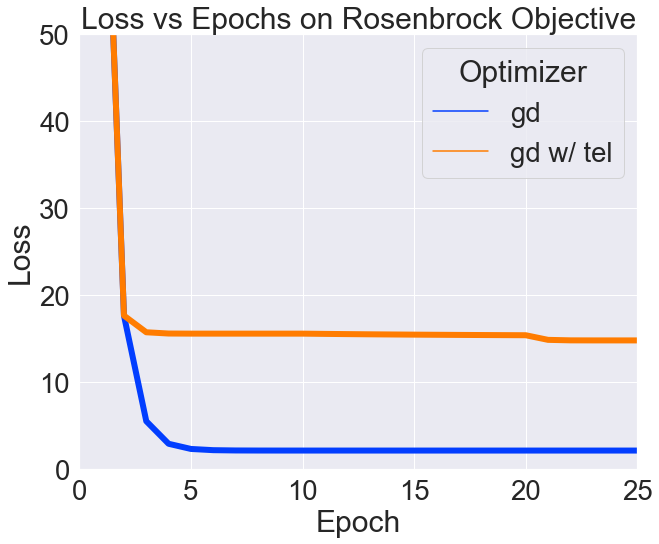

In [12]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=ros2, x="epoch", y="loss", hue="label", linewidth=6)

fig.set_title("Loss vs Epochs on Rosenbrock Objective")
fig.set(xlabel="Epoch", ylabel="Loss")
fig.set(xlim=(0,25))
fig.set(ylim=(0,50))
fig.legend(title="Optimizer")

/var/folders/v9/l2syhrfj31q2b_prbjk3y0yh0000gn/T/ipykernel_25633/3397992072.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/torch/csrc/utils/tensor_new.cpp:210.)
  vec = ros_v_to_x(torch.tensor([u,v]))


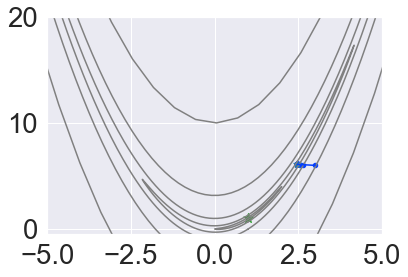

In [13]:
label = "gd"
x_arr = np.array(ros2[ros2["label"]==label].x.tolist())[:,0]
y_arr = np.array(ros2[ros2["label"]==label].x.tolist())[:,1]

plt.figure()
plot_level_sets_ros()
plt.scatter(x_arr, y_arr, s=20)
plt.plot(x_arr, y_arr)
plt.scatter(x_arr[-1], y_arr[-1], marker="*", s=60, color='#1f77b4')
plt.scatter(1, 1, marker="*", s=100, color='#2ca02c')
plt.show()

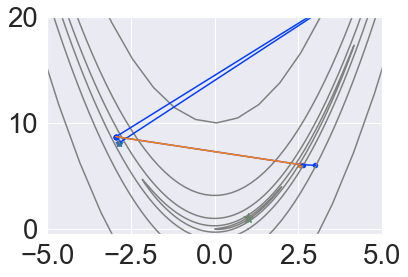

In [14]:
label = "gd w/ tel"
x_arr_teleport = np.array(ros2[ros2["label"]==label].x.tolist())[:,0]
y_arr_teleport = np.array(ros2[ros2["label"]==label].x.tolist())[:,1]

plt.figure()
plot_level_sets_ros()
plt.scatter(x_arr_teleport, y_arr_teleport, s=20)
plt.plot(x_arr_teleport, y_arr_teleport)
g_idx = [2,11,22]
plt.scatter(x_arr_teleport[g_idx], y_arr_teleport[g_idx], s=20) # orange dots
for idx in g_idx:
    plt.plot(x_arr_teleport[idx:idx+2], y_arr_teleport[idx:idx+2], color='#ff7f0e') # orange line
plt.scatter(x_arr_teleport[-1], y_arr_teleport[-1], marker="*", s=60, color='#1f77b4')  # initial point (blue dot)
plt.scatter(1, 1, marker="*", s=100, color='#2ca02c') # target point (green star)
plt.show()

In [15]:
obj = booth
opts = ["cmaes", "gd", "gd"]
epochs = 100
x_init = torch.tensor([0.0,-3.0],requires_grad=True)
labels = ["cmaes", "gd", "gd w/ tel @ epoch 2"]
changes = [[["cmaes","s",0.5]],[["gd","lr",0.01]],[["gd","lr",0.01]]]
ts = [[],[],[2]]
mrs = [1,1,1]

bth = run(obj, opts, epochs, x_init, labels, changes, ts, multiruns=mrs, verbose=0)

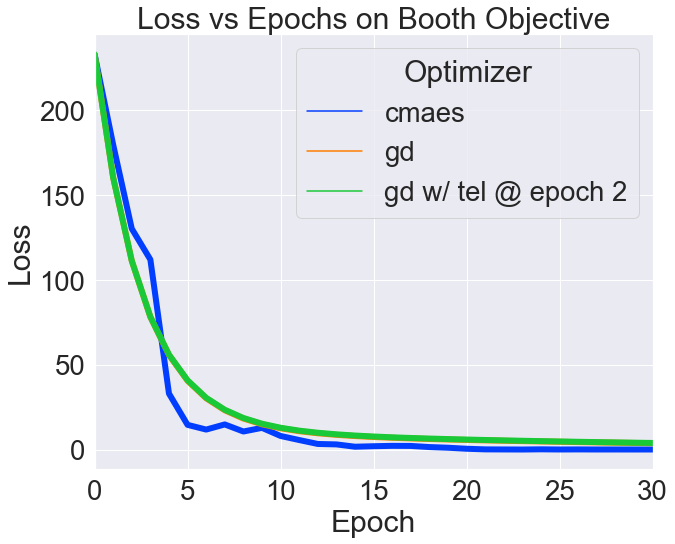

In [16]:
sns.set_theme(font_scale=2.5, style="darkgrid", palette="bright")
plt.figure(figsize=(10,8))

fig = sns.lineplot(data=bth, x="epoch", y="loss", hue="label", linewidth=6)

fig.set_title("Loss vs Epochs on Booth Objective")
fig.set(xlabel="Epoch", ylabel="Loss")
fig.set(xlim=(0, 30))
fig.legend(title="Optimizer")

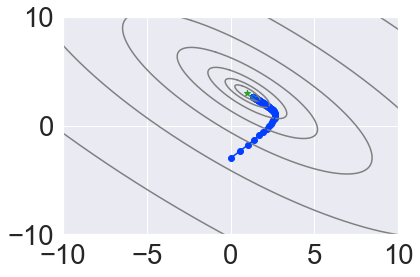

In [17]:
label = "gd"
x_arr = np.array(bth[bth["label"]==label].x.tolist())[:,0]
y_arr = np.array(bth[bth["label"]==label].x.tolist())[:,1]

plt.figure()
plot_level_sets_bth()
plt.scatter(x_arr, y_arr)
plt.plot(x_arr, y_arr)
plt.scatter(x_arr[-1], y_arr[-1], marker="*", s=60, color='#1f77b4')
plt.scatter(1, 3, marker="*", s=40, color='#2ca02c')
plt.show()

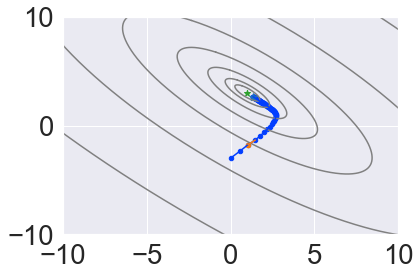

In [18]:
label = "gd w/ tel @ epoch 2"
x_arr_teleport = np.array(bth[bth["label"]==label].x.tolist())[:,0]
y_arr_teleport = np.array(bth[bth["label"]==label].x.tolist())[:,1]

plt.figure()
plot_level_sets_bth()
plt.scatter(x_arr_teleport, y_arr_teleport, s=20)
plt.plot(x_arr_teleport, y_arr_teleport)
g_idx = [2]
plt.scatter(x_arr_teleport[g_idx], y_arr_teleport[g_idx], s=20) # orange dots
for idx in g_idx:
    plt.plot(x_arr_teleport[idx:idx+2], y_arr_teleport[idx:idx+2], color='#ff7f0e') # orange line
plt.scatter(x_arr_teleport[-1], y_arr_teleport[-1], marker="*", s=60, color='#1f77b4')   # initial point (blue dot)
plt.scatter(1, 3, marker="*", s=40, color='#2ca02c') # target point (green star)
plt.show()